In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


### Steps to do the projects

1. Importing Required Libraries
2. Data Pre-Processing
3. Building the Model train it, and test it

### Importing Required Libraries

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

### Data Pre-Processing


Before normalizing first image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

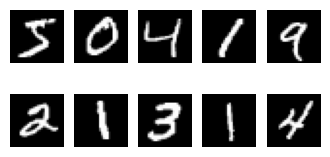

In [3]:
# load data and split it to train, test
def load_images_and_labels(file_path, image=False, label=False):
    if image:
        with open(file_path, "rb") as file:    
            file.read(16)    # Skip the header for images
            binary_data = file.read()
        numpy_data = np.frombuffer(binary_data, dtype=np.uint8)
        num_images = numpy_data.size // 784 
        data = numpy_data.reshape(num_images, 784)
        return (data)
    
    if label:
        with open(file_path, "rb") as file:
            file.read(8)    # Skip the header for labels
            binary_data = file.read()
        numpy_data = np.frombuffer(binary_data, dtype=np.uint8)
        return (numpy_data)

list_data_path = [
    "/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte",
    "/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte",
    "/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte",
    "/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"
]


# Split the Data
x_train = load_images_and_labels(list_data_path[0], image=True, label=False)
y_train = load_images_and_labels(list_data_path[1], image=False, label=True)
x_test = load_images_and_labels(list_data_path[2], image=True, label=False)
y_test = load_images_and_labels(list_data_path[3], image=False, label=True)


# Resizing the Data
x_train = x_train.reshape(x_train.shape[0], 28,28)
x_test = x_test.reshape(x_test.shape[0], 28,28)


# Normalize the Data
print(f"\nBefore normalizing first image:\n{x_train[0]}")
x_train = x_train / 255.0
x_test = x_test / 255.0
print(f"\nAfter normalizing first image:\n{x_train[0]}")


# Labelling Data,
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Dimensions of Data
print("\nShapes of Datasets...\n")
print(f"x_train size: {x_train.shape}\ny_train size: {y_train.shape}")
print(f"x_test size: {x_test.shape}\ny_test size: {y_test.shape}")


# Visualize the Data
print("\nVisualising of Datasets...\n")
figure, axis = plt.subplots(2, 5, figsize=(4,2))
axis = axis.ravel()
for i in range(10):
    axis[i].imshow(x_train[i].reshape(28,28), cmap="gray")
    axis[i].axis("off")
plt.show()

### Building the Model 

In [4]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(units=128, activation="relu"),
    Dropout(0.1),
    Dense(units=64, activation="relu"),
    Dropout(0.1),
    Dense(units=10, activation="softmax"),
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,410 (196.91 KB)

 Trainable params: 50,410 (196.91 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [6]:
# Train the Model
time_1 = time.time()
train = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)
time_2 = time.time()
print(f"Duration of training: {(time_2 - time_1) / 60:.2f} minute")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.7269 - loss: 0.8099 - val_accuracy: 0.9570 - val_loss: 0.1337
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9462 - loss: 0.1770 - val_accuracy: 0.9778 - val_loss: 0.0720
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9611 - loss: 0.1310 - val_accuracy: 0.9850 - val_loss: 0.0542
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9715 - loss: 0.0979 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9741 - loss: 0.0873 - val_accuracy: 0.9853 - val_loss: 0.0492
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9756 - loss: 0.0805 - val_accuracy: 0.9865 - val_loss: 0.0432
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9805 - loss: 0.0670 - val_accuracy: 0.9877 - val_loss: 0.0400
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9797 -

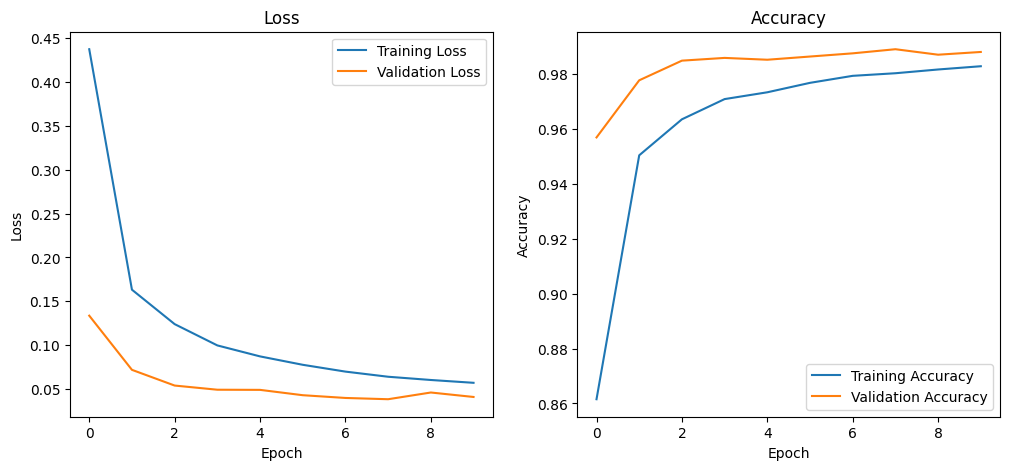

In [7]:
# Graphing the education process
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)    # 1 => row, 2 => column, 1 => index
plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [8]:
# Testing the Model
loss, acc = model.evaluate(x_test, y_test)
print(f"accuracy rate: {acc:.4f}\nloss rate: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9854 - loss: 0.0540
accuracy rate: 0.9880
loss rate: 0.0457


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

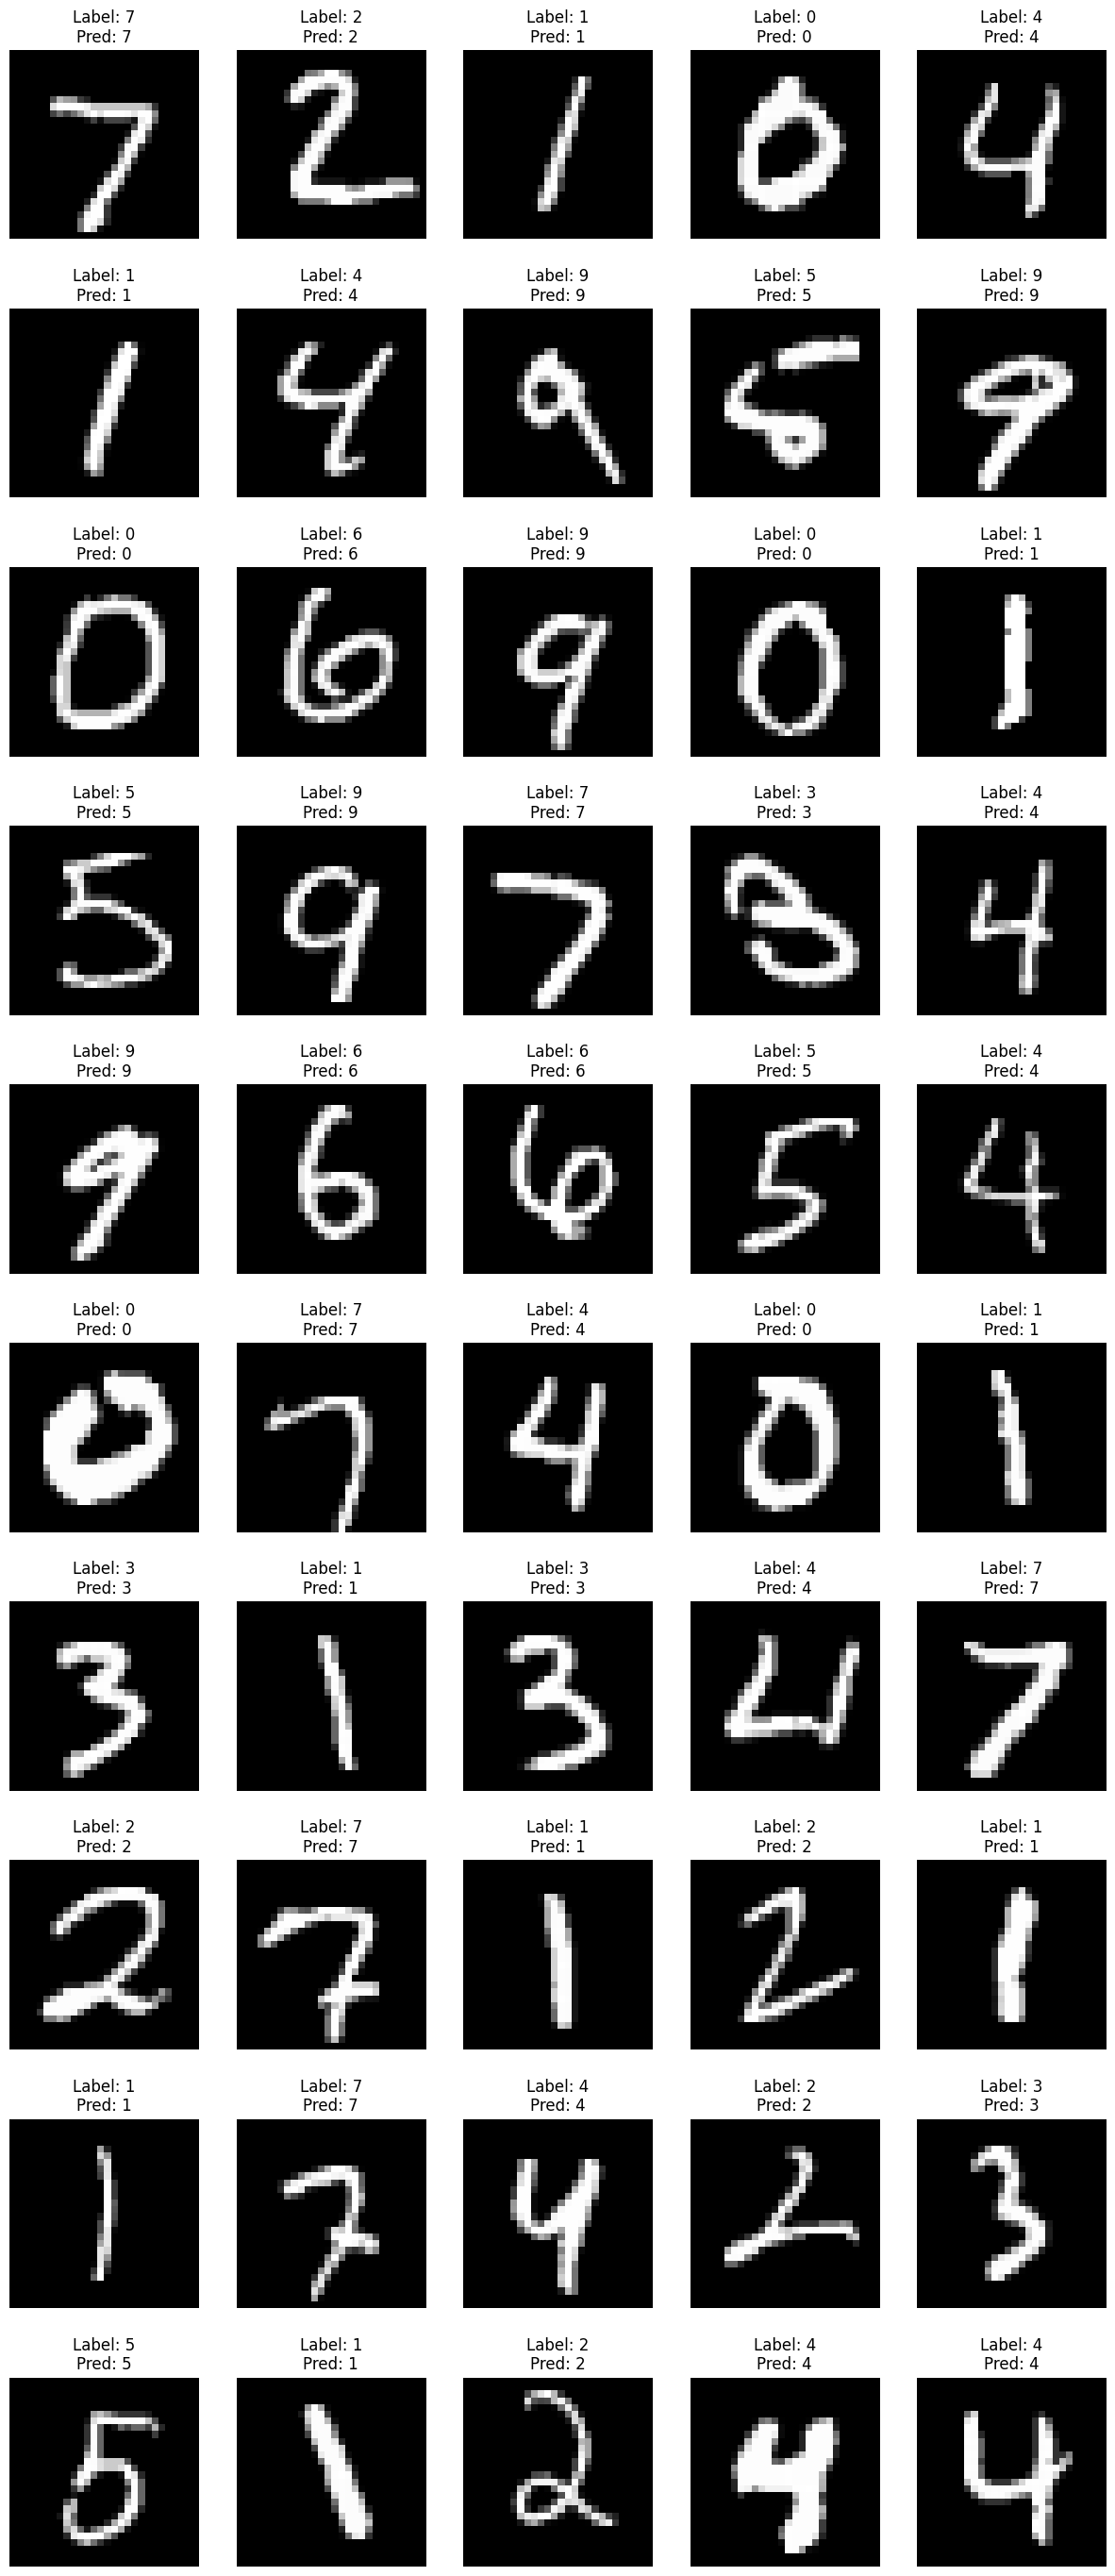


num false: 0 | num correct: 50
Accuracy rate for 50 images is: 1.0
Loss rate for 50 images is: 0.0


In [9]:
# Make predictios and Visualize the test data 
def test_predictions(idx, x_test, y_test):
    model_predictions = np.argmax(model.predict(np.expand_dims(x_test[idx], axis=0)))
    true_labels = np.argmax(y_test[idx])
    return (model_predictions, true_labels)

def calculate_acc_and_loss(idx, prediction, label):
    n_false, n_correct = 0, 0
    if prediction != label:
        n_false += 1
    else:
        n_correct += 1
    return (n_correct, n_false)

def acc_and_loss_rate(n_cor, n_fal):
    correct_rate = n_correct / (n_correct + n_false)
    false_rate = n_false / (n_correct + n_false)
    return (correct_rate, false_rate)

n_correct, n_false = 0, 0
num_samples = 50
plt.figure(figsize=(15,35))
for i in range(num_samples):
    output, label = test_predictions(i, x_test, y_test)
    correct, false = calculate_acc_and_loss(i, output, label)
    n_correct += correct
    n_false += false
    plt.subplot(10, 5, i +1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {label}\nPred: {output}")
    plt.axis("off")
plt.show()

print(f"\nnum false: {n_false} | num correct: {n_correct}")
correct_rate, false_rate = acc_and_loss_rate(n_correct, n_false)
print(f"Accuracy rate for {num_samples} images is: {correct_rate}") 
print(f"Loss rate for {num_samples} images is: {false_rate}") 